In [1]:
# load libraries and data
import pandas as pd

train = pd.read_csv("../intermediate_ml/train.csv")
train.head()

# 0. Leave testing data untouched - note: already dropped 'SalePrice' because that's what is being predicted
test = pd.read_csv("../intermediate_ml/test.csv")

In [ ]:
# data at a glance
# view all missing data

train.info()

# from this point, use training set

In [3]:
# 1st. separate target from predictors (features)
# 2nd. after separate target from predictor, portion off training set into a validation set
# 3rd. [USE PIPELINE to simplify] whatever pre-processing applied to training and validation data, also apply to testing data

# Note: make copy of both train and test
# Note: given data have different number of observations (train; 1460), (test; 1459) 
# - see intermediate_ml/random_forest.ipynb

train1 = train.copy()
test1 = test.copy()

In [ ]:
train1

In [ ]:
#train1.SalePrice

#train1.drop(['SalePrice'], axis=1)

In [14]:
# Separate target from predictors
# Run both X and y with train_test_split function

# Create target object (training data)
y = train1.SalePrice

X = train1.drop(['SalePrice'], axis=1)

In [19]:
# Now that we've separate target from predictor in the training set
# divide data into training and validation subsets

from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# This is a RANDOM split

In [ ]:
# 1168 rows x 80 columns

X_train_full

In [ ]:
# 292 rows x 80 columns

X_valid_full

In [ ]:
# length 1168

y_train

In [ ]:
# length 292

y_valid

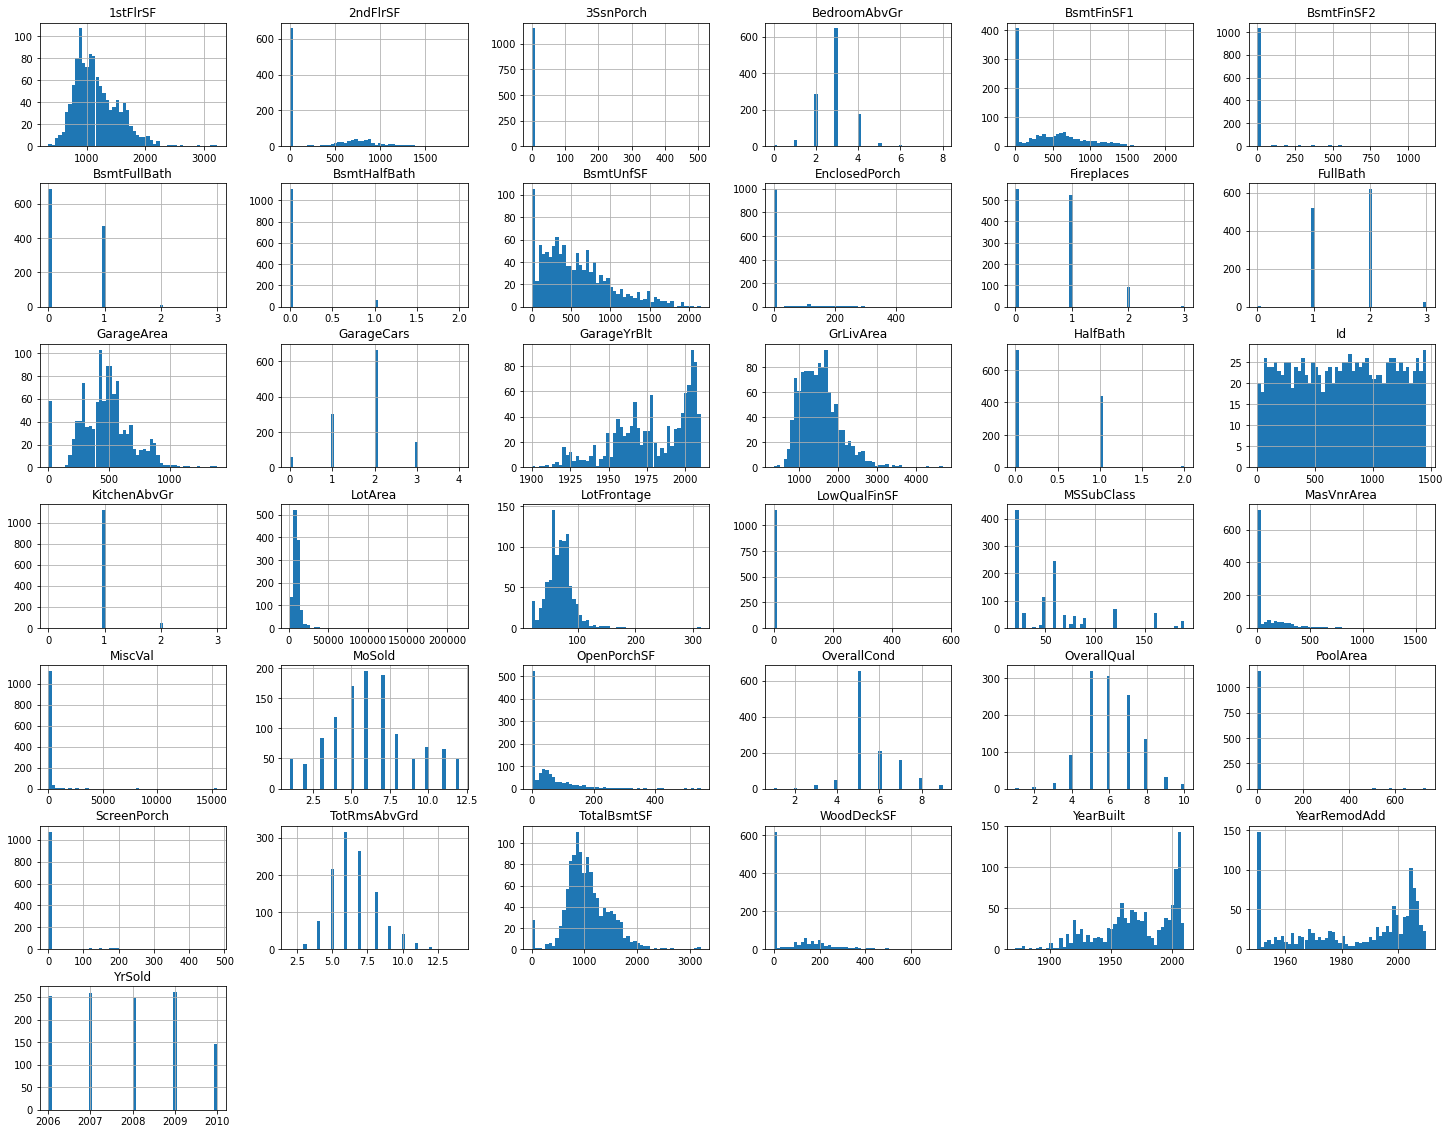

In [24]:
# histogram of all numeric variables

%matplotlib inline
import matplotlib.pyplot as plt

X_train_full.hist(bins=50, figsize=(25,20))
plt.show()

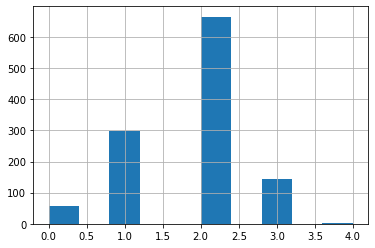

In [25]:
X_train_full['GarageCars'].hist()

In [31]:
# Use Pipeline to handle missing and categorical data
# X_train_full, X_valid_full, y_train, y_valid

# Cardinality - pick categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and X_train_full[cname].dtype == 'object']


In [32]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


In [35]:
# Keep selected columns only

my_cols = categorical_cols + numerical_cols

# Make copies of X_train_full & X_valid_full (NOTE: not y_train or y_valid) - from original train_test_split
# Original: X_train_full, X_valid_full, y_train, y_valid

X_train = X_train_full[my_cols].copy()

X_valid = X_valid_full[my_cols].copy()

In [36]:
# Define Preprocessing Steps - handle missing & categorical data - with Pipelines

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Select and Train a Regression Model

In [37]:
# Training and Evaluation on Training Set
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()


In [39]:
# Create and Evaluate Pipeline

from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and regression model code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', regression_model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 24365.10594806601


# Select and Train a RandomForestRegressor Model

In [40]:


from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=0)



In [41]:
# Create and Evaluate Pipeline

# Bundle preprocessing and RandomForestRegressor model
my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                              ])

my_pipeline2.fit(X_train, y_train)

preds2 = my_pipeline2.predict(X_valid)

score2 = mean_absolute_error(y_valid, preds2)
print('Mean Absolute Error (Random Forest):', score2)

Mean Absolute Error (Random Forest): 17741.26297945205
